In [1]:
import numpy as np
import zarr
import matplotlib.pyplot as plt
from tqdm import tqdm
import netCDF4 as nc

In [2]:
import sys
sys.path.insert(0, '/data/SO2/SO24/ANDY/SOHI/Utils')
import Andy

In [3]:
bathy = nc.Dataset("/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/Annum/Amundsen.nc")
XC = bathy['lon'][:]
YC = bathy['lat'][:]
ocean = bathy['THETA'][0,0,:,:]

bathy, XC, YC = Andy.loads.sohi_meta('bathymetry', lat_bounds = YC, lon_bounds=XC)
bathy[bathy==0] = np.nan
ice, XC, YC = Andy.loads.sohi_meta('icedraft', lat_bounds = YC, lon_bounds=XC)
ice[ice!=0] = 1

# np.save('bathymetry.npy', bathy)
# np.save('ice.npy', ice)

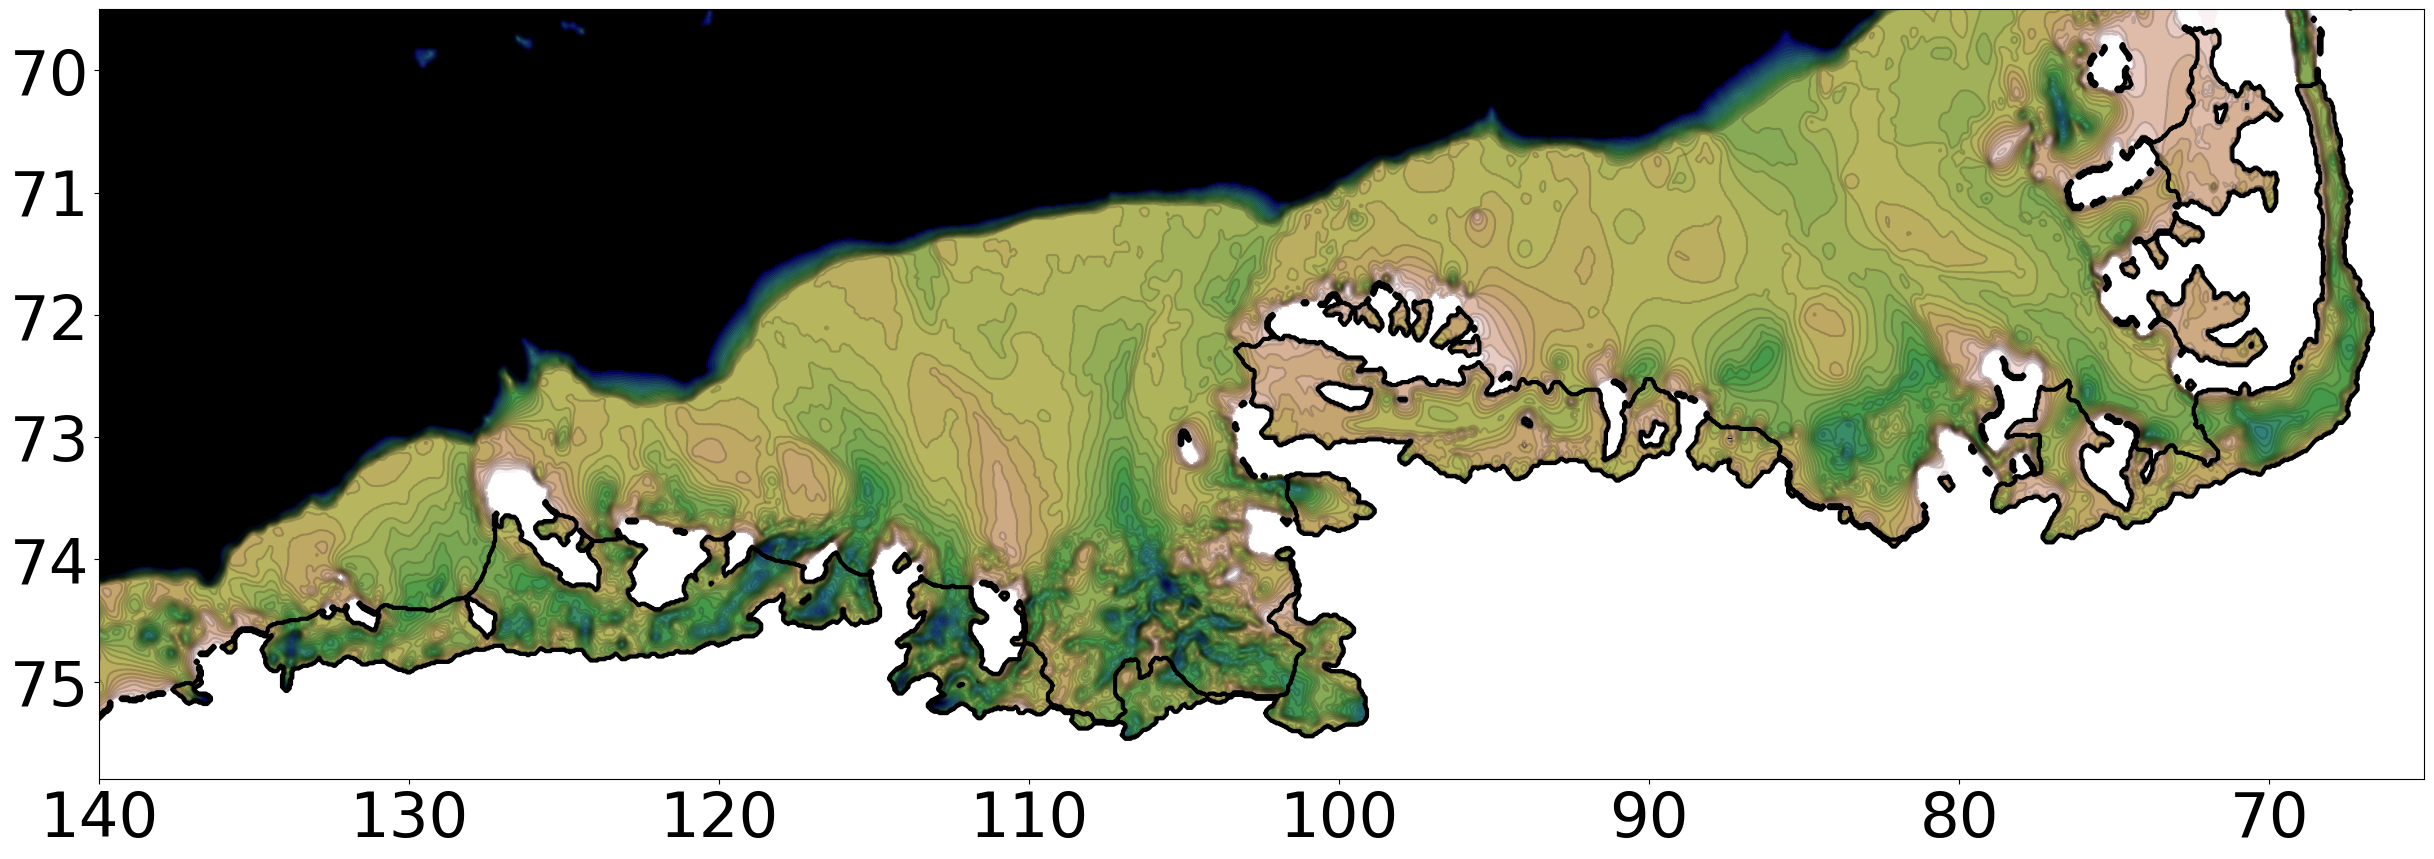

In [37]:
fig, ax = plt.subplots(figsize=(30,10))
im1 = ax.pcolormesh(XC, YC, bathy, vmin=-1600, vmax=0, cmap='gist_earth')
im2 = ax.contourf(XC, YC, bathy, levels=np.arange(-1601, 1, 50), cmap='gist_earth')
ax.contour(XC, YC, bathy, levels=np.arange(-1601, 1, 50), colors=['k'], linestyles='solid', alpha = 0.2)
ax.contour(XC, YC, ice, levels=[0,1], linewidths=3, colors='k')

ax.tick_params(axis='both', labelsize=45)

ax.set_ylim(-75.8, -69.5)
ax.set_xlim(-139.9, -65)
ax.set_xticks([-140, -130, -120, -110, -100, -90, -80, -70])
ax.set_xticklabels([140, 130, 120, 110, 100, 90, 80, 70])

ax.set_yticks([-75, -74, -73, -72, -71, -70])
ax.set_yticklabels([75, 74, 73, 72, 71, 70])

# ax.plot([-122, -122], [-73, -70.5])
# ax.plot([-115, -115], [-73, -70.5])
# ax.plot([-110, -110], [-73, -70.5])
# ax.plot([-104, -104], [-74, -70])
# ax.plot([-97, -97], [-74, -70])


plt.savefig('img_maps/region.png', dpi=300)

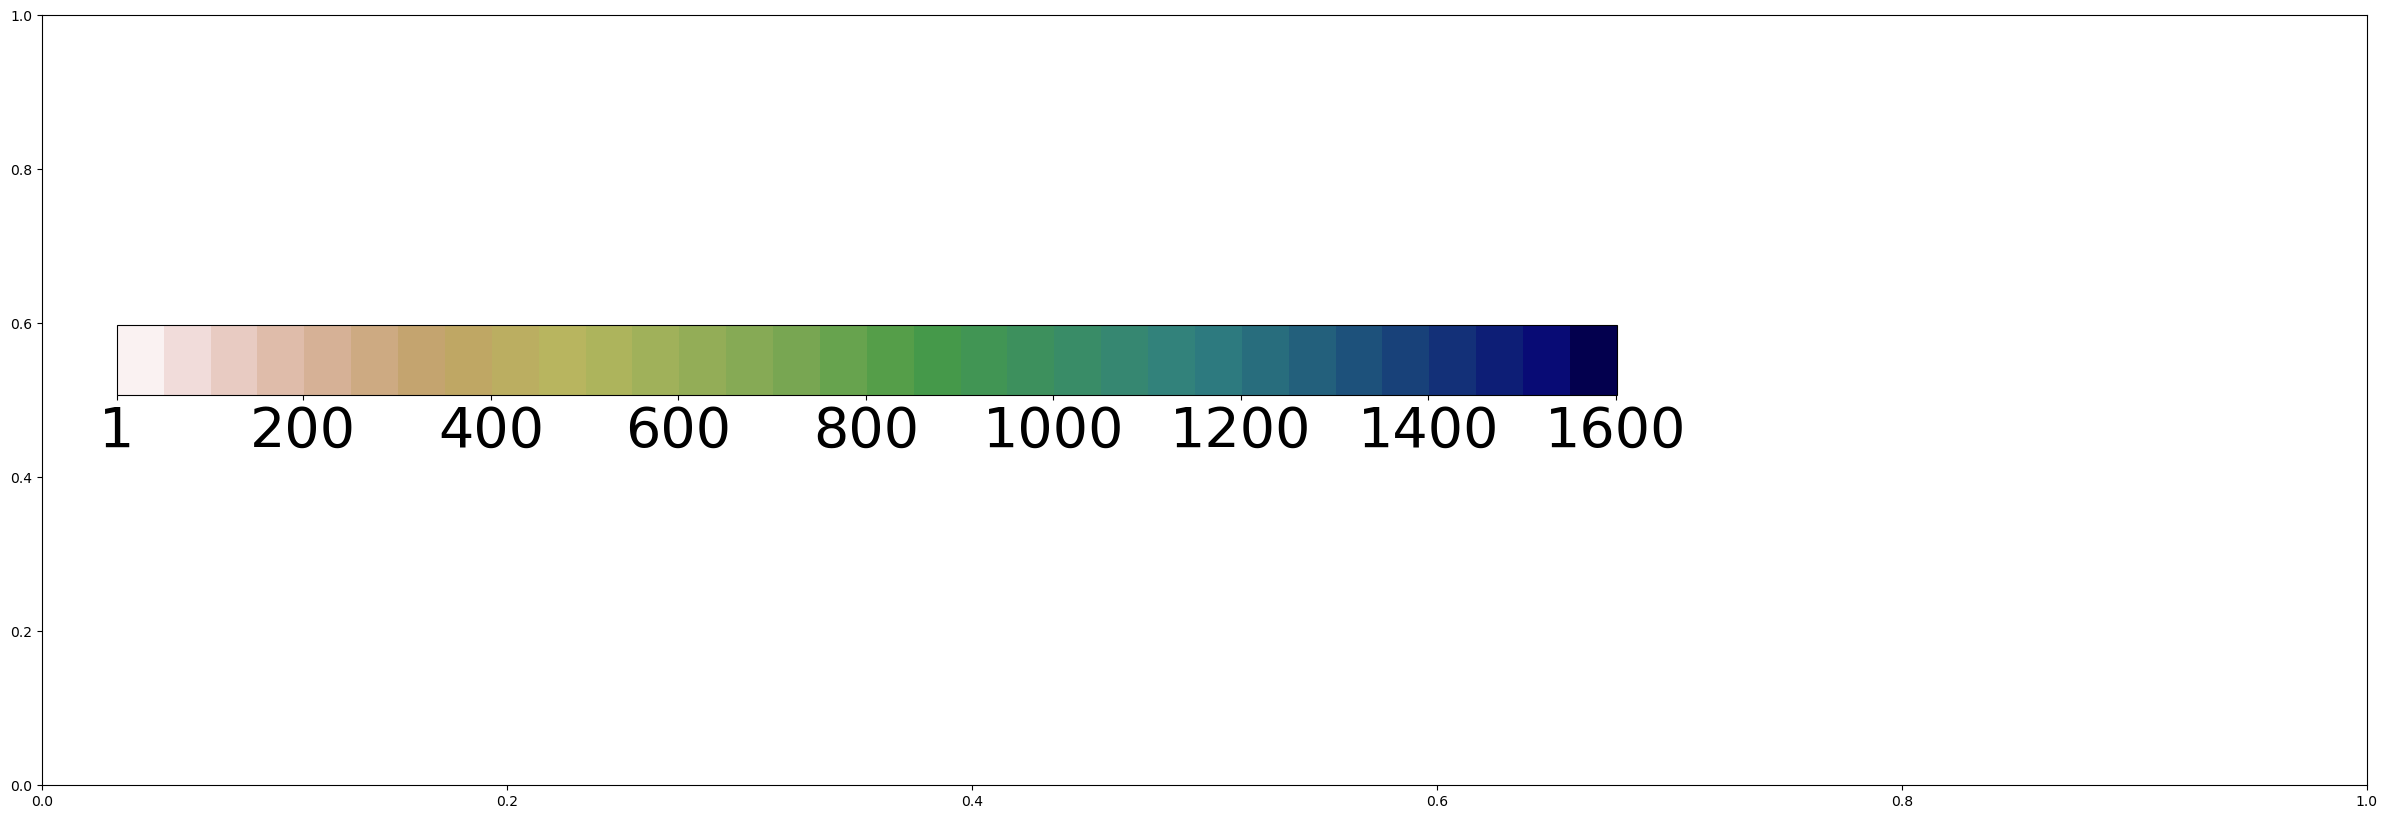

In [39]:
fig, ax = plt.subplots(figsize=(30,10))

cbar_ax = fig.add_axes([0.15, 0.5, 0.5, 0.07])
cbar = fig.colorbar(im2, cax=cbar_ax,orientation='horizontal', extend='min')
cbar.ax.set_xlabel(f'', size=20)
cbar.ax.tick_params(labelsize=40)

cbar.ax.set_xticks([-1600, -1400,-1200, -1000, -800, -600, -400, -200, -1])
cbar.ax.set_xticklabels([1600, 1400,1200, 1000, 800, 600, 400, 200, 1])

cbar.ax.invert_xaxis()

plt.savefig('img_maps/cbar1.png', dpi=300)

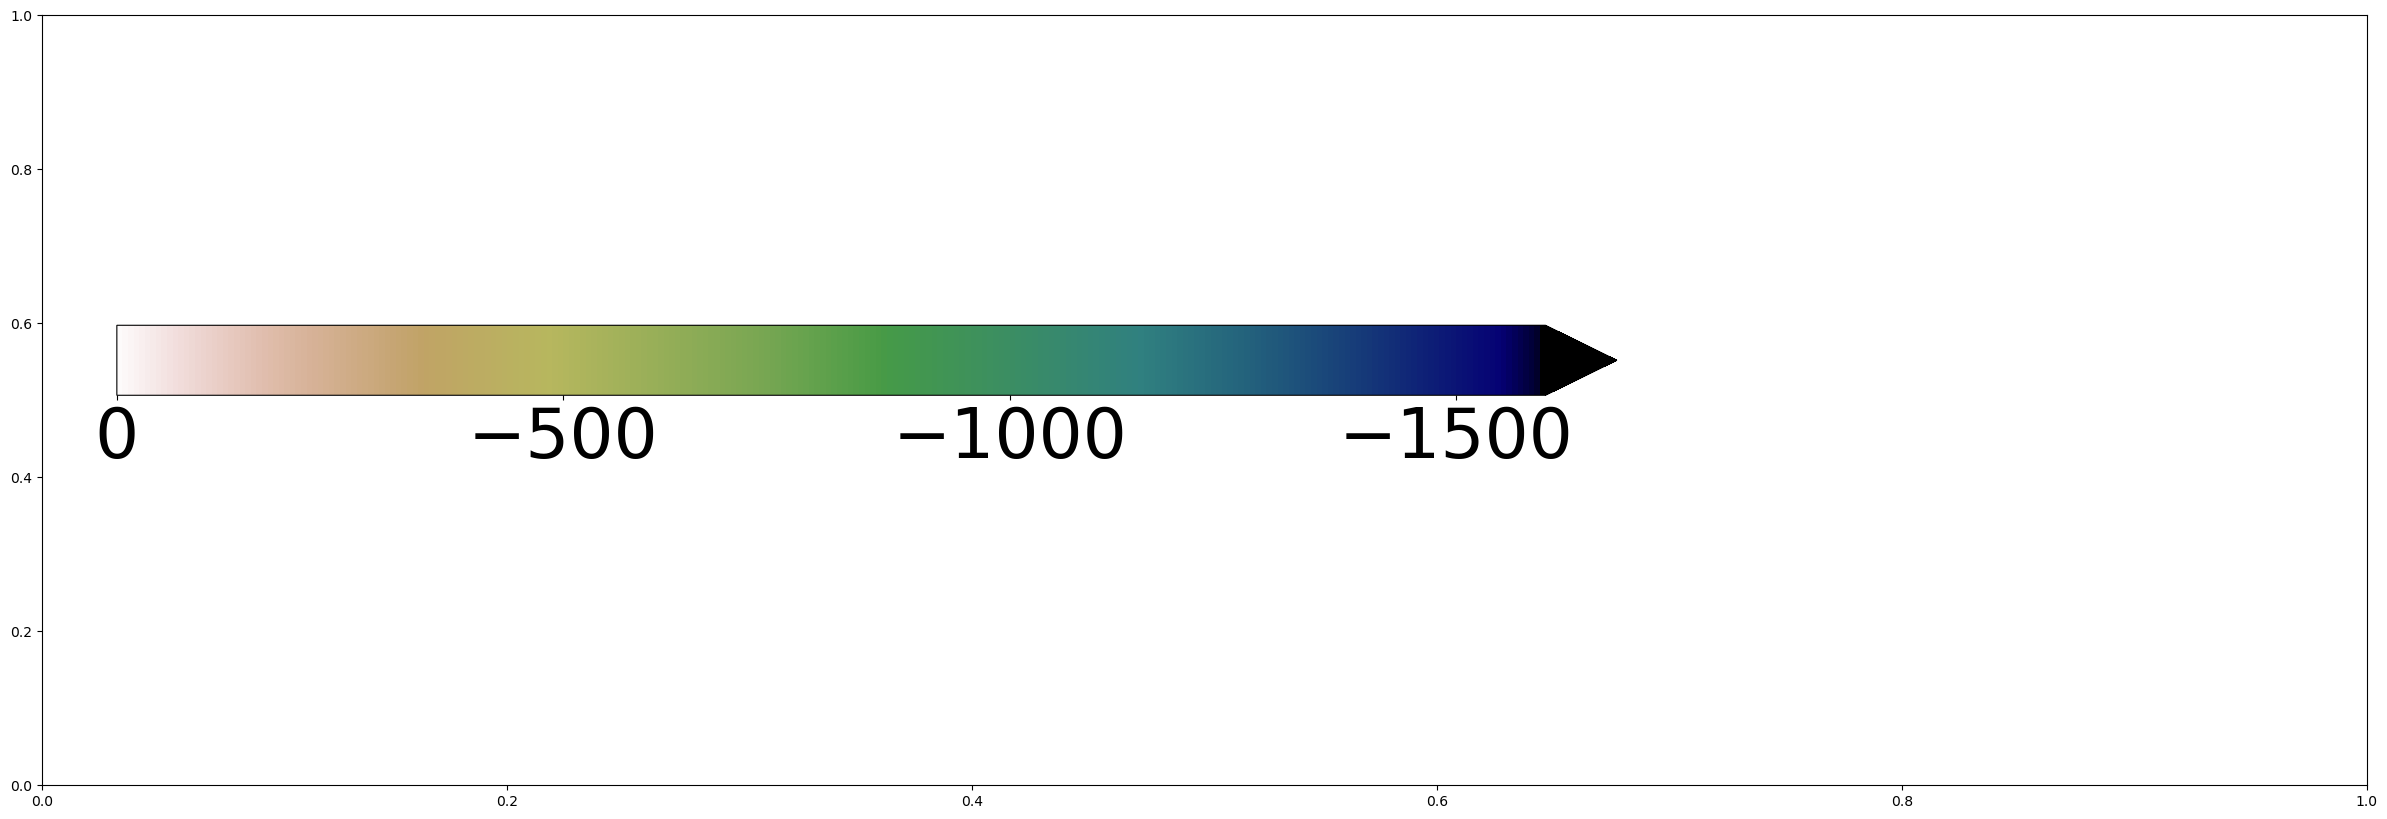

In [40]:
fig, ax = plt.subplots(figsize=(30,10))

cbar_ax = fig.add_axes([0.15, 0.5, 0.5, 0.07])
cbar = fig.colorbar(im1, cax=cbar_ax,orientation='horizontal', extend='min')
cbar.ax.set_xlabel(f'', size=20)
cbar.ax.tick_params(labelsize=50)

# cbar.ax.set_xticks([-1400, -1200, -1000, -800, -600, -400, -200, 0])
# cbar.ax.set_xticklabels([1400, 1200, 1000, 800, 600, 400, 200, 0])

cbar.ax.invert_xaxis()
plt.savefig('img_maps/cbar2.png', dpi=300)

In [16]:
np.save('ocean_mask.npy', np.asarray(ocean))